<a href="https://colab.research.google.com/github/HyejuSeon/deep_learning_study/blob/main/mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

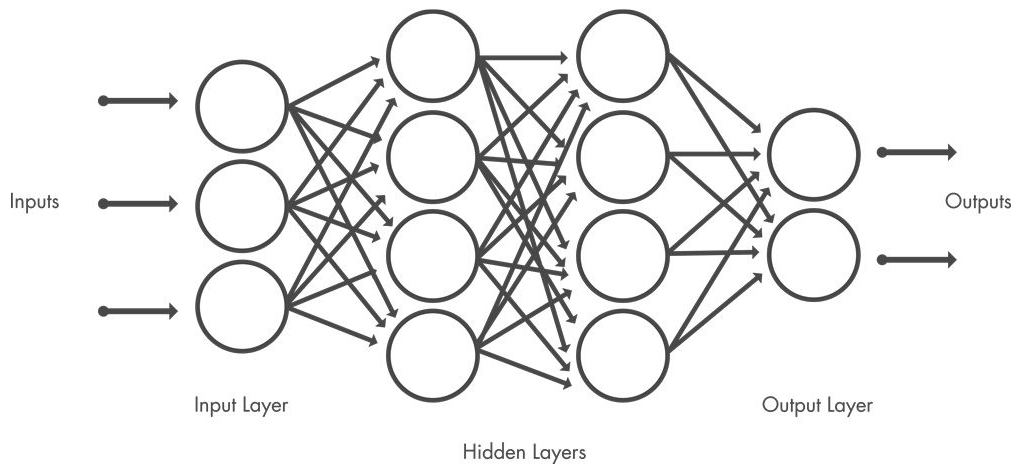

## 딥러닝
- 머신러닝의 한 분야로 인공신경망을 쌓아올려 데이터를 학습하는 방식
- 크게 input layer, hidden layer, output layer로 나뉨
- 다음 레이어로 전달될 때 각 유닛에 가중치(w)가 곱해져서 전달됨

  -> 전달 받은 결과의 모두 더해서 해당 유닛을 활성화시킬지 판단

  -> 이때 activation function을 씌워서 값을 보정
 (https://wikidocs.net/60683)

- 가설 수립 -> 모델 정의 및 학습 -> 평가 -> 가설 수립(피드백) -> 모델 정의 및 학습 -> ... 반복 ...

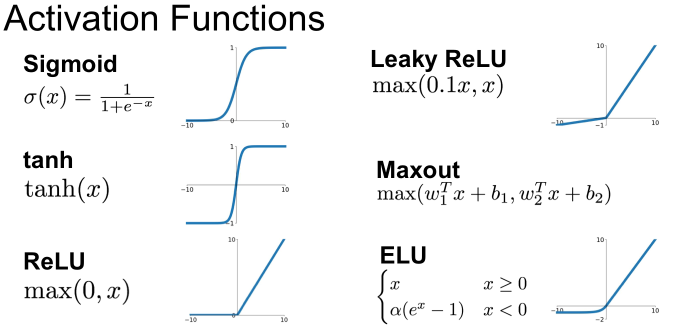

In [31]:
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2

from sklearn.model_selection import KFold, StratifiedKFold

In [5]:
import tensorflow as tf
print(tf.test.gpu_device_name())

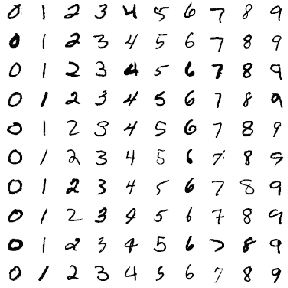

## Train/Validation/Test split



### split 비율

- train:test = 7:3 or train:val:test = 6:2:2

- BUT 빅데이터는 98:1:1
    
  val/testset은 평가만 하기 때문에



In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [ ]:
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
type(x_train)
# python list 보다 연산이 빠름
# -> 행렬 내적 연산 훨씬 빠름

numpy.ndarray

In [ ]:
x_train[0]

5


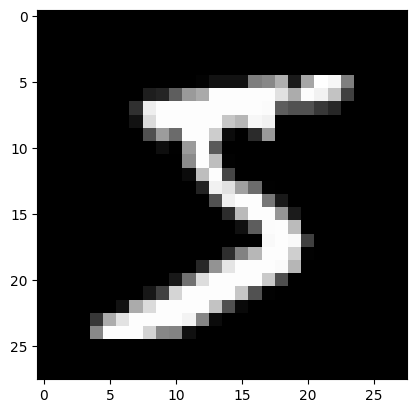

In [ ]:
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

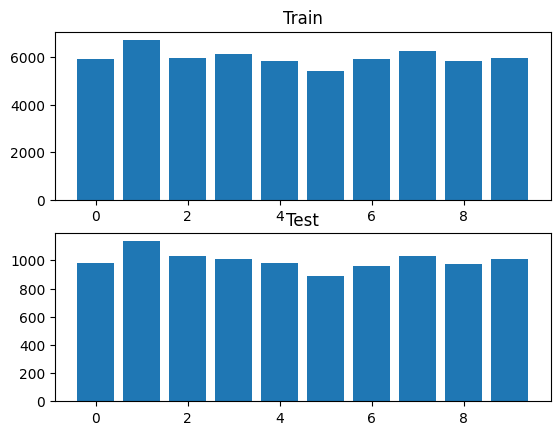

In [ ]:
labels_train, cnts_train = np.unique(y_train, return_counts=True)
labels_test, cnts_test = np.unique(y_test, return_counts=True)

plt.subplot(2, 1, 1)
plt.bar(labels_train, cnts_train)
plt.title('Train')

plt.subplot(2, 1, 2)
plt.bar(labels_test, cnts_test)
plt.title('Test')
plt.show()

## loss

- 정답값과 모델의 예측값을 통해 loss를 계산하는 함수

- 모델은 loss를 최소화하는 weight을 찾는 방향으로 학습 수행 -> 이때 사용하는 최적화 알고리즘이 optimizer

#### binary_crossentropy
- binary classification

<br>

#### categorical_crossentropy
- multi-class classification
- label이 one-hot encoding 형태일 때 사용

>  label에 사람, 강아지, 고양이가 있다면 <br> 사람 -> (1, 0, 0) <br> 강아지 -> (0, 1, 0) <br> 고양이 -> (0, 0, 1)

<br>

#### sparse_categorical_crossentropy
- multi-class classification
- label 정수 형태에서 사용

> label 예시 - 정수 <br> 사람 -> 0, 강아지 -> 1, 고양이 -> 2

In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4265 - accuracy: 0.8567
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.9115
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2844 - accuracy: 0.9276
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2457 - accuracy: 0.9359
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2264 - accuracy: 0.9417
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2091 - accuracy: 0.9452
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2015 - accuracy: 0.9484
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1945 - accuracy: 0.9512
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1890 - accuracy: 0.9533
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.186

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.9459


[0.2571479380130768, 0.945900022983551]

In [ ]:
model(x_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0000000e+00, 3.8024923e-21, 0.0000000e+00, 1.2134931e-04,
        9.1773041e-36, 9.9987864e-01, 0.0000000e+00, 2.8804307e-12,
        2.0300078e-14, 9.9684305e-09]], dtype=float32)>

In [ ]:
y_train[0]

5

## Bias (편향) / Variance (분산)

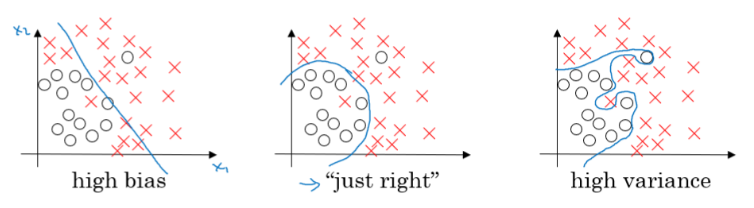

- high variance -> Overfitting
- high bias -> Underfitting

<br>

- 어떻게 판단?

  Training error 낮고, Dev error 높음 -> Overfitting (일반화 x)

  Training error 높고, Dev error 높음 -> Underfitting (+Overfitting -> error 차이가 큰 경우)

<br>

- 해결 방법

  High bias -> 더 큰 네트워크 사용(more layer, more hidden units), epoch 증가

  High Variance -> 더 많은 데이터 학습, 정규화 (Regularization)

  <br>


- 둘은 tradeoff?

  예전엔 YES, 지금은 더 큰 네트워크 구성하면 bias는 variance와 상관없이 대체로 줄어듦

## Regularization

#### L2 norm

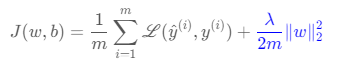


- 위 수식은 가장 많이 사용되는 L2 Regularization -> 가중치 감쇠라고도 함 (Weight Decay)

- lambda 값이 클수록 규제 효과가 커짐 -> hidden unit의 영향도가 작아짐

### Dropout

- 각 레이어에서 비활성화할 노드 비율 설정

- test set은 dropout 사용 X -> 예측값이 랜덤해짐 -> noise 추가

### Batch Normalization

- 각 레이어에 배치 단위로 데이터 분포를 정규화

- dropout과 비슷한 효과

- 베타, 감마는 학습 파라미터

### Data Augementation

### Early Stopping


## Normalization

- feature 간 데이터 스케일을 유사하게 맞춤 + feature 값의 범위가 클수록 학습이 어려움 -> 학습 시 더 빠르게 최적화 가능

  learning rate 높게 설정하면 값이 발산해서 최적화가 힘듦

  ex. x1: -1 ~ 1, x2: -100000000000 ~ 100000000000

## mini batch

- 전체 데이터를 작은 데이터셋 여러 개로 나누어 학습

  -> 한 번에 학습할 데이터셋이 작아짐 -> 연산량 감소 -> 가중치 업데이트가 빠름

- 보통 64, 128, 256, 512로 세팅




In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [ ]:
np.unique(x_train_norm)

In [ ]:
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4091 - accuracy: 0.8743
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1556 - accuracy: 0.9552
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1133 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.022

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9791


[0.07379365712404251, 0.9790999889373779]

In [ ]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 140ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model(x_train[:1]).numpy()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [9]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.dropout = Dropout(0.2)
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(64, activation='relu')
    self.softmax = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.dropout(x)
    x = self.d2(x)
    x = self.dropout(x)
    return self.softmax(x)

  def summary(self):
    inputs = Input((28, 28))
    Model(inputs, self.call(inputs)).summary()

In [ ]:
model2 = MyModel()

model2.summary()

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model2.fit(x_train_norm,
                  y_train,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  batch_size=32)  # shuffle 전에 val set 분리

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2821 - accuracy: 0.9191 - val_loss: 0.1608 - val_accuracy: 0.9533
Epoch 2/10
1500/1500 [===================

In [ ]:
model2.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0808 - accuracy: 0.9780


[0.08082147687673569, 0.9779999852180481]

In [10]:
def draw_graph(history):
  loss = history.history['loss']
  accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  epochs = list(range(1, len(loss)+1))

  fig, ax1 = plt.subplots()

  color = 'tab:red'
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss', color=color)
  ax1.plot(epochs, loss, color=color, label='train')
  ax1.plot(epochs, val_loss, linestyle='--', color=color, label='val')
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('Accuracy', color=color)
  ax2.plot(epochs, accuracy, color=color, label='train')
  ax2.plot(epochs, val_accuracy, linestyle='--', color=color, label='val')
  ax2.tick_params(axis='y', labelcolor=color)

  lines1, labels1 = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  lines = lines1 + lines2
  labels = labels1 + labels2
  ax1.legend(lines, labels, loc='center right')

  plt.show()

draw_graph(hist)

NameError: ignored

In [ ]:
model3 = MyModel()

model3.summary()

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model3.fit(x_train_norm,
                  y_train,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  batch_size=32)  # shuffle 전에 val set 분리

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================]

In [ ]:
model3.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0687 - accuracy: 0.9788


[0.06865980476140976, 0.9787999987602234]

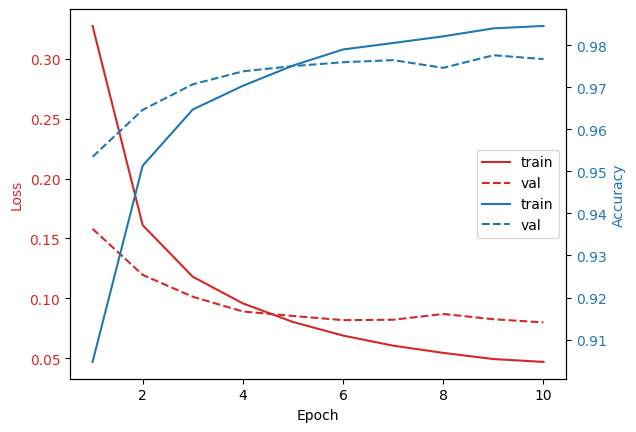

In [ ]:
draw_graph(hist)

In [ ]:
model4 = MyModel()

model4.summary()

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights= True)

hist = model4.fit(x_train_norm,
                  y_train,
                  epochs=20,
                  validation_split=0.2,
                  shuffle=True,
                  batch_size=32,
                  callbacks=es)

model4.evaluate(x_test_norm, y_test)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================]

[0.06822420656681061, 0.9790999889373779]

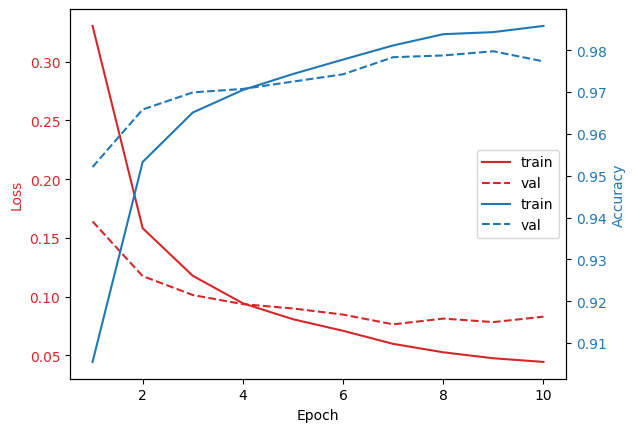

In [ ]:
draw_graph(hist)

## k-fold cross validation

- 데이터를 k개 fold로 나눠서 1개씩 validation set으로 할당 -> 모든 데이터를 train/val에 사용
- 특정 학습/평가 데이터에 하이퍼파라미터 튜닝하고 있는지 확인
- k-fold 중에서 가장 좋은 모델을 고르는 건 의미 없음 -> 해당 모델이 다른 데이터셋에서도 성능이 좋을거란 보장 없음
- k-fold로 여러 모델들을 테스트하고 최종 선택된 모델에 전체 데이터 학습시켜서 사용 or 각 모델의 예측값을 평균(like 앙상블)

### Stratified cross validation

- label 분포를 동일하게 나눔
- classification에서 사용
- imbalanced data 일 때 사용

In [ ]:
model5 = MyModel()

model5.summary()

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights= True)

pred_list = []
loss_sum = acc_sum = 0


k = 5
kfold = KFold(n_splits=k, shuffle=True)

for i, (train_idx, val_idx) in enumerate(kfold.split(x_train)):
  print(f"Fold {i+1}")

  x_trn, y_trn = x_train[train_idx], y_train[train_idx]
  x_val, y_val = x_train[val_idx], y_train[val_idx]


  es = EarlyStopping(monitor='val_loss',
                     patience=3,
                    restore_best_weights= True)
  history = model5.fit(x_trn,
                       y_trn,
                       epochs=20,
                       batch_size=32,
                       validation_data=(x_val, y_val), callbacks=es)


  pred = model5.predict(x_test)
  pred_list.append(pred)
  loss, acc = model5.evaluate(x_test, y_test)
  loss_sum = loss_sum + loss
  acc_sum = acc_sum + acc
  print(f'loss: {loss:.4f} accuracy: {acc:.4f}')

print('*'*150)
print(f'loss avg: {loss_sum / k:.4f} accuracy avg: {acc_sum / k:.4f}')
print('*'*150)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_16 (Flatten)           (None, 784)          0           ['input_16[0][0]']               
                                                                                                  
 dense_31 (Dense)               (None, 128)          100480      ['flatten_16[0][0]']             
                                                                                                  
 dropout_15 (Dropout)           multiple             0           ['dense_31[0][0]',               
                                                                  'dense_32[0][0]']        

In [34]:
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

In [38]:
class CNNModel(Model):
  def __init__(self):
    super(CNNModel, self).__init__()
    self.flatten = Flatten()
    self.dropout = Dropout(0.2)
    self.maxpool = MaxPooling2D(pool_size=(2, 2), padding='valid')
    self.conv1 = Conv2D(filters=512,
                        kernel_size=(3, 3),
                        input_shape=(28, 28, 1),
                        padding='same',
                        activation='relu')
    self.conv2 = Conv2D(filters=256,
                        kernel_size=(3, 3),
                        padding='same',
                        activation='relu')
    self.conv3 = Conv2D(filters=128,
                        kernel_size=(3, 3),
                        padding='same',
                        activation='relu')
    self.conv4 = Conv2D(filters=64,
                        kernel_size=(3, 3),
                        padding='same',
                        activation='relu')
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(64, activation='relu')
    self.softmax = Dense(10, activation='softmax')

  def call(self, x):
    x = self.maxpool(self.conv1(x))
    x = self.maxpool(self.conv2(x))
    x = self.maxpool(self.conv3(x))
    x = self.maxpool(self.conv4(x))
    x = self.flatten(x)
    return self.softmax(x)

  def summary(self):
    inputs = Input((28, 28, 1))
    Model(inputs, self.call(inputs)).summary()

In [39]:
cnn = CNNModel()

cnn.summary()

cnn.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights= True)

pred_list = []
loss_sum = acc_sum = 0


k = 5
kfold = KFold(n_splits=k, shuffle=True)

x_train_norm_re = x_train_norm.reshape(x_train_norm.shape[0], x_train_norm.shape[1], x_train_norm.shape[2], 1)
x_test_norm_re = x_test_norm.reshape(x_test_norm.shape[0], x_test_norm.shape[1], x_test_norm.shape[2], 1)

print(x_train_norm_re.shape)
print(x_test_norm_re.shape)

for i, (train_idx, val_idx) in enumerate(kfold.split(x_train_norm_re)):
  print(f"Fold {i+1}")

  x_trn, y_trn = x_train_norm_re[train_idx], y_train_onehot[train_idx]
  x_val, y_val = x_train_norm_re[val_idx], y_train_onehot[val_idx]

  print(x_trn.shape)
  es = EarlyStopping(monitor='val_loss',
                      patience=3,
                      restore_best_weights= True)
  history = cnn.fit(x_trn,
                    y_trn,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val), callbacks=es)


  pred = cnn.predict(x_test_norm_re)
  pred_list.append(pred)
  loss, acc = cnn.evaluate(x_test_norm_re, y_test_onehot)
  loss_sum = loss_sum + loss
  acc_sum = acc_sum + acc
  print(f'loss: {loss:.4f} accuracy: {acc:.4f}')

print('*'*150)
print(f'loss avg: {loss_sum / k:.4f} accuracy avg: {acc_sum / k:.4f}')
print('*'*150)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_106 (Conv2D)            (None, 28, 28, 512)  5120        ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  multiple            0           ['conv2d_106[0][0]',             
                                                                  'conv2d_108[0][0]',             
                                                                  'conv2d_109[0][0]']             
                                                                                            

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Fold 1
(48000, 28, 28, 1)
Epoch 1/20
 75/375 [=====>........................] - ETA: 9:48 - loss: 0.6123 - accuracy: 0.8142

KeyboardInterrupt: ignored

In [ ]:
cnn = CNNModel()

cnn.summary()

cnn.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights= True)

pred_list = []
loss_sum = acc_sum = 0


k = 5
stf_kfold = StratifiedKFold(n_splits=k, shuffle=True)

x_train_norm_re = x_train_norm.reshape(x_train_norm.shape[0], x_train_norm.shape[1], x_train_norm.shape[2], 1)
x_test_norm_re = x_test_norm.reshape(x_test_norm.shape[0], x_test_norm.shape[1], x_test_norm.shape[2], 1)

print(x_train_norm_re.shape)
print(x_test_norm_re.shape)

for i, (train_idx, val_idx) in enumerate(stf_kfold.split(x_train_norm_re)):
  print(f"Fold {i+1}")

  x_trn, y_trn = x_train_norm_re[train_idx], y_train_onehot[train_idx]
  x_val, y_val = x_train_norm_re[val_idx], y_train_onehot[val_idx]

  print(x_trn.shape)
  es = EarlyStopping(monitor='val_loss',
                      patience=3,
                      restore_best_weights= True)
  history = cnn.fit(x_trn,
                    y_trn,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val), callbacks=es)


  pred = cnn.predict(x_test_norm_re)
  pred_list.append(pred)
  loss, acc = cnn.evaluate(x_test_norm_re, y_test_onehot)
  loss_sum = loss_sum + loss
  acc_sum = acc_sum + acc
  print(f'loss: {loss:.4f} accuracy: {acc:.4f}')

print('*'*150)
print(f'loss avg: {loss_sum / k:.4f} accuracy avg: {acc_sum / k:.4f}')
print('*'*150)

## transfer learning


In [12]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [13]:
# Get the Horse or Human training dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Get the Horse or Human validation dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

test_local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/training')

val_local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/validation')

zip_ref.close()

In [14]:
# Define the training and validation base directories
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Directory with training horse pictures
train_horses_dir = os.path.join(train_dir, 'horses')
# Directory with training humans pictures
train_humans_dir = os.path.join(train_dir, 'humans')
# Directory with validation horse pictures
validation_horses_dir = os.path.join(validation_dir, 'horses')
# Directory with validation human pictures
validation_humans_dir = os.path.join(validation_dir, 'humans')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_horses_dir))} images of horses for training.\n")
print(f"There are {len(os.listdir(train_humans_dir))} images of humans for training.\n")
print(f"There are {len(os.listdir(validation_horses_dir))} images of horses for validation.\n")
print(f"There are {len(os.listdir(validation_humans_dir))} images of humans for validation.\n")

There are 500 images of horses for training.

There are 527 images of humans for training.

There are 128 images of horses for validation.

There are 128 images of humans for validation.



Sample horse image:


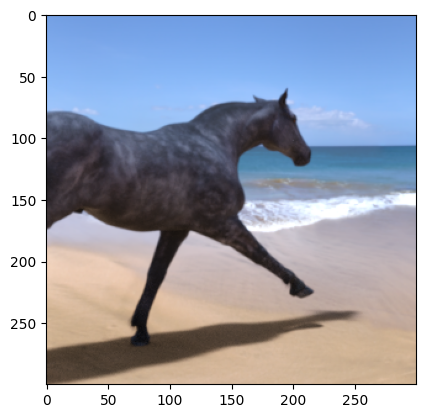


Sample human image:


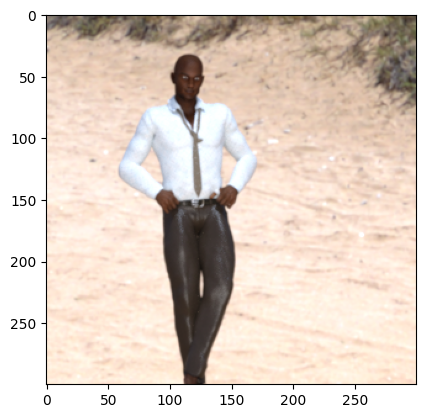

In [15]:
print("Sample horse image:")
plt.imshow(load_img(f"{os.path.join(train_horses_dir, os.listdir(train_horses_dir)[0])}"))
plt.show()

print("\nSample human image:")
plt.imshow(load_img(f"{os.path.join(train_humans_dir, os.listdir(train_humans_dir)[0])}"))
plt.show()

In [16]:
# Load the first example of a horse
sample_image  = load_img(f"{os.path.join(train_horses_dir, os.listdir(train_horses_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [17]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class
  # Don't forget to normalize pixel values and set arguments to augment the images
  train_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [18]:
# Test your generators
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-09-08 05:20:15--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   158MB/s    in 0.5s    

2023-09-08 05:20:16 (158 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [20]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [21]:
# GRADED FUNCTION: create_pre_trained_model
def create_pre_trained_model(local_weights_file):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [22]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [23]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [24]:

# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [25]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [26]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [27]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [28]:
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  ### END CODE HERE

  return model

In [29]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,512,481 total parameters in this model.
There are 38,537,217 trainable parameters in this model.


In [30]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()